In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely import Polygon

mpl.rcParams["svg.hashsalt"] = "42"

metadata = {
    "png": {"Author": "Gergő Pintér", "CreationDate": None, "Copyright": "CC BY 4.0"},
    "svg": {"Creator": "Gergő Pintér", "Date": None, "Rights": "CC BY 4.0"},
}

In [2]:
weeplace = pd.read_csv("../data/weeplace/weeplace_checkins.csv")
weeplace = gpd.GeoDataFrame(weeplace, geometry=gpd.points_from_xy(weeplace["lon"], weeplace["lat"]), crs=4326)


In [36]:
weeplace_wm = weeplace.to_crs(3857)

In [33]:
# (27, 50.55)
# (12, 43.55)
# area_polygon = Polygon([(9, 43.615), (27, 43.615), (27, 50.5), (9, 50.5)])
area_polygon = Polygon([(12, 42.56), (27, 42.56), (27, 51), (12, 51)])
area = gpd.GeoDataFrame(geometry=[area_polygon], crs=4326)
area_wm = area.to_crs(3857)["geometry"][0]


In [37]:
cropped_wm = weeplace_wm[weeplace_wm["geometry"].within(area_wm)]

In [8]:
area_extra = gpd.GeoDataFrame(geometry=[Polygon([(10, 30), (30, 30), (30, 60), (10, 60)])], crs=4326)
area_extra = Polygon([(10, 30), (30, 30), (30, 60), (10, 60)])

In [ ]:
cropped = weeplace[weeplace["geometry"].within(area_polygon)]
cropped.to_file("out.geojson")

In [ ]:
# fig, ax = plt.subplots(figsize=(16,9), facecolor="#2e3440", dpi=120)
# ax.margins(0)
# ax.axis("off")
# cropped.plot(ax=ax, markersize=1, color="#ebcb8b", aspect=None)
# for i in ["png"]:
#     fig.savefig(f"../figures/central_europe_X.{i}", metadata=metadata[i], pad_inches=0)

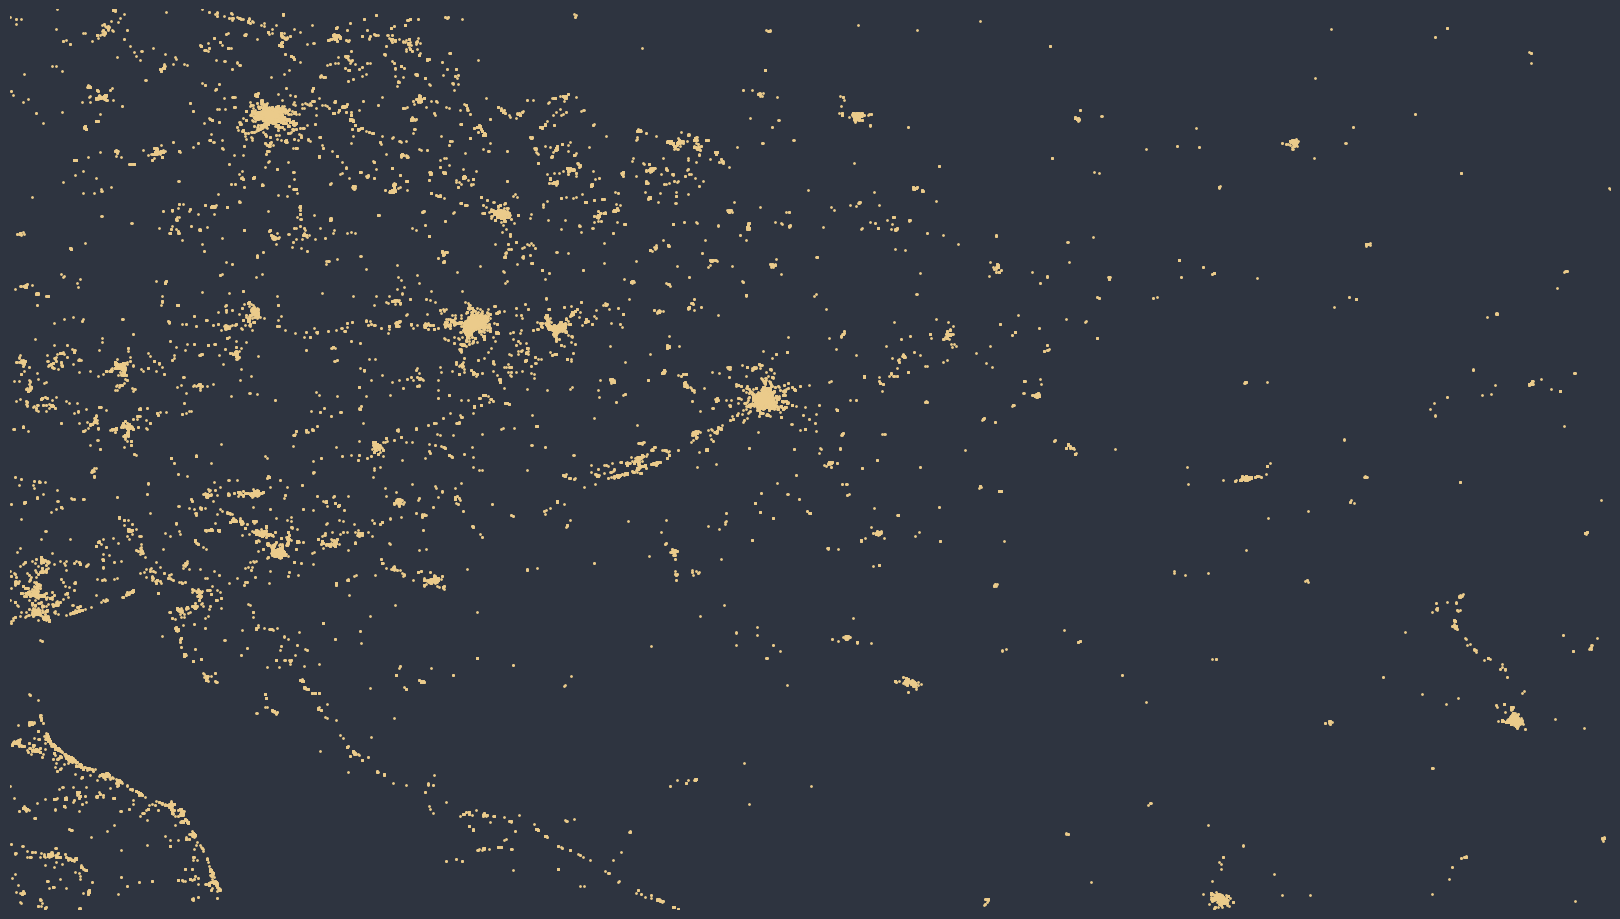

In [43]:
fig = plt.figure(figsize=(16, 9), facecolor="#2e3440")
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.set_aspect("auto")
ax.margins(0)
ax.axis("off")
cropped_wm.plot(ax=ax, markersize=1, color="#ebcb8b", aspect=None)
for i in ["png"]:
    fig.savefig(f"../figures/central_europe.{i}", metadata=metadata[i], pad_inches=0)

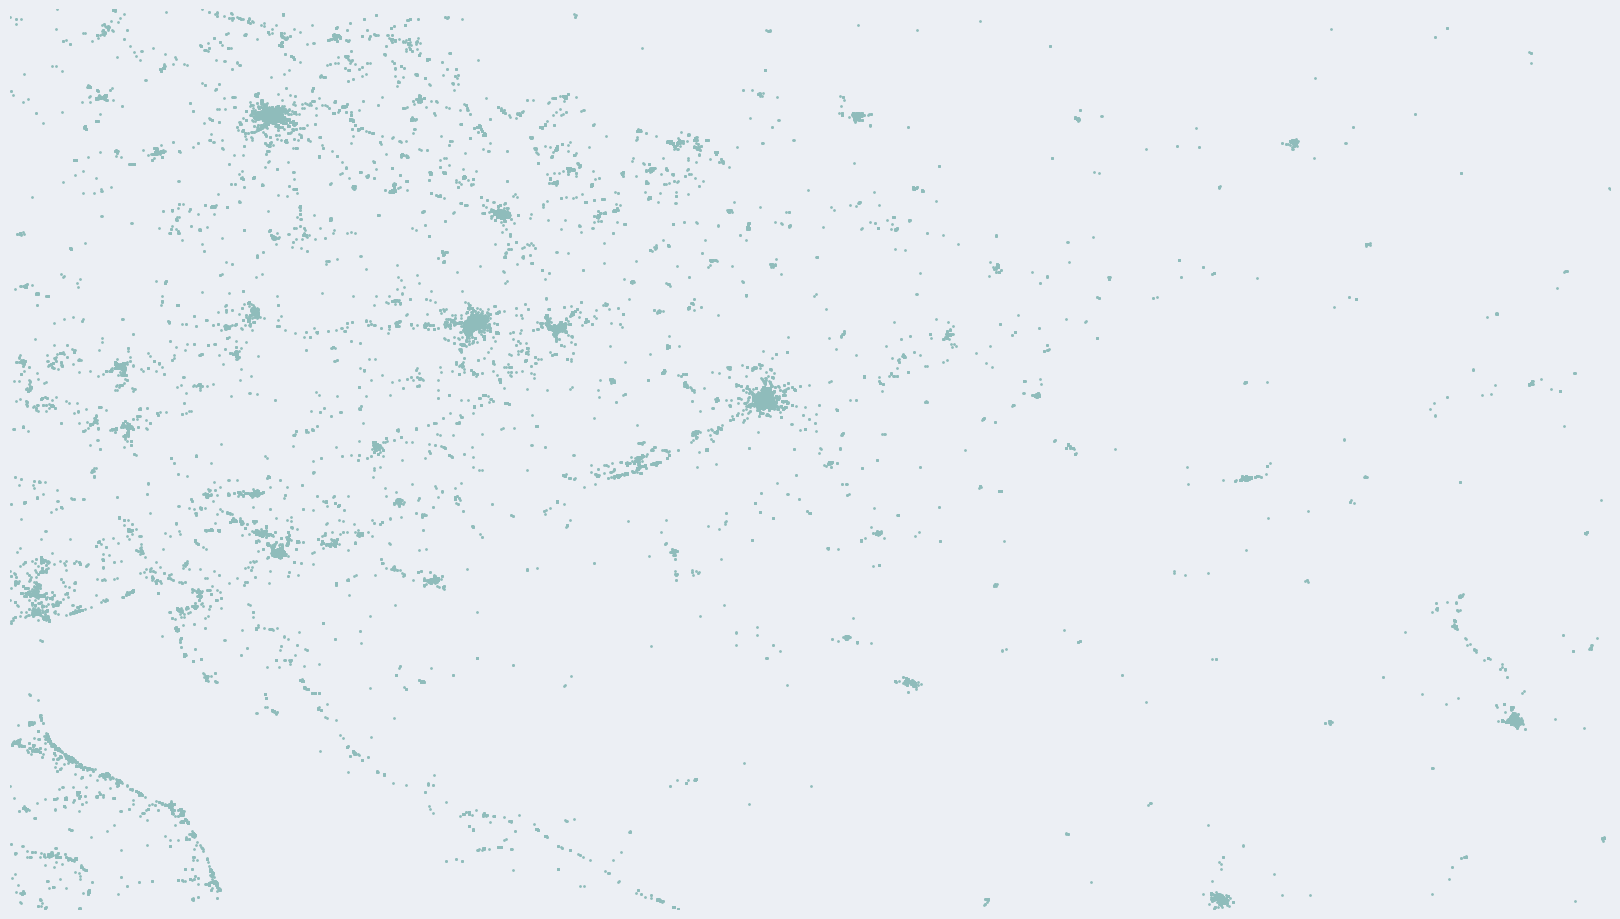

In [44]:
fig = plt.figure(figsize=(16, 9), facecolor="#eceff4")
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.set_aspect("auto")
ax.margins(0)
ax.axis("off")
cropped_wm.plot(ax=ax, markersize=1, color="#8fbcbb", aspect=None)
for i in ["png"]:
    fig.savefig(f"../figures/central_europe_light.{i}", metadata=metadata[i], pad_inches=0)

In [5]:
b = area.to_crs(3857).bounds
# b = area.bounds
(b["maxx"][0] - b["minx"][0]) /( b["maxy"][0] - b["miny"][0])

np.float64(1.7775299432385228)

In [6]:
16/9

1.7777777777777777

In [7]:
data = weeplace[weeplace.geometry.within(area_wm)].copy()
data.head(3)

,userid,placeid,datetime,lat,lon,city,category,geometry
3452,maia-bittner,paris-texas-budapest,2010-07-10T13:34:25,47.486605,19.063720,Budapest,Nightlife Spots:Pubs,POINT (2122163.648 6021865.191)
3453,maia-bittner,california-coffee-company-budapest,2010-07-11T08:35:00,47.489694,19.061819,Budapest,Food:Café,POINT (2121952.029 6022374.194)
3454,maia-bittner,if-kavezo-budapest,2010-07-11T18:38:56,47.486596,19.063695,Budapest,Food:Café,POINT (2122160.853 6021863.775)


In [8]:
data.union_all().bounds

(1001999.3157327151, 5406098.826400241, 3005074.2180635426, 6533310.717279494)

In [9]:
(26.995041-12.000384) / (50.9982828-42.5611728553)

1.7772266923485223

In [10]:
(3005074-1335876) / (6620989-5245414)

1.2134547371099358

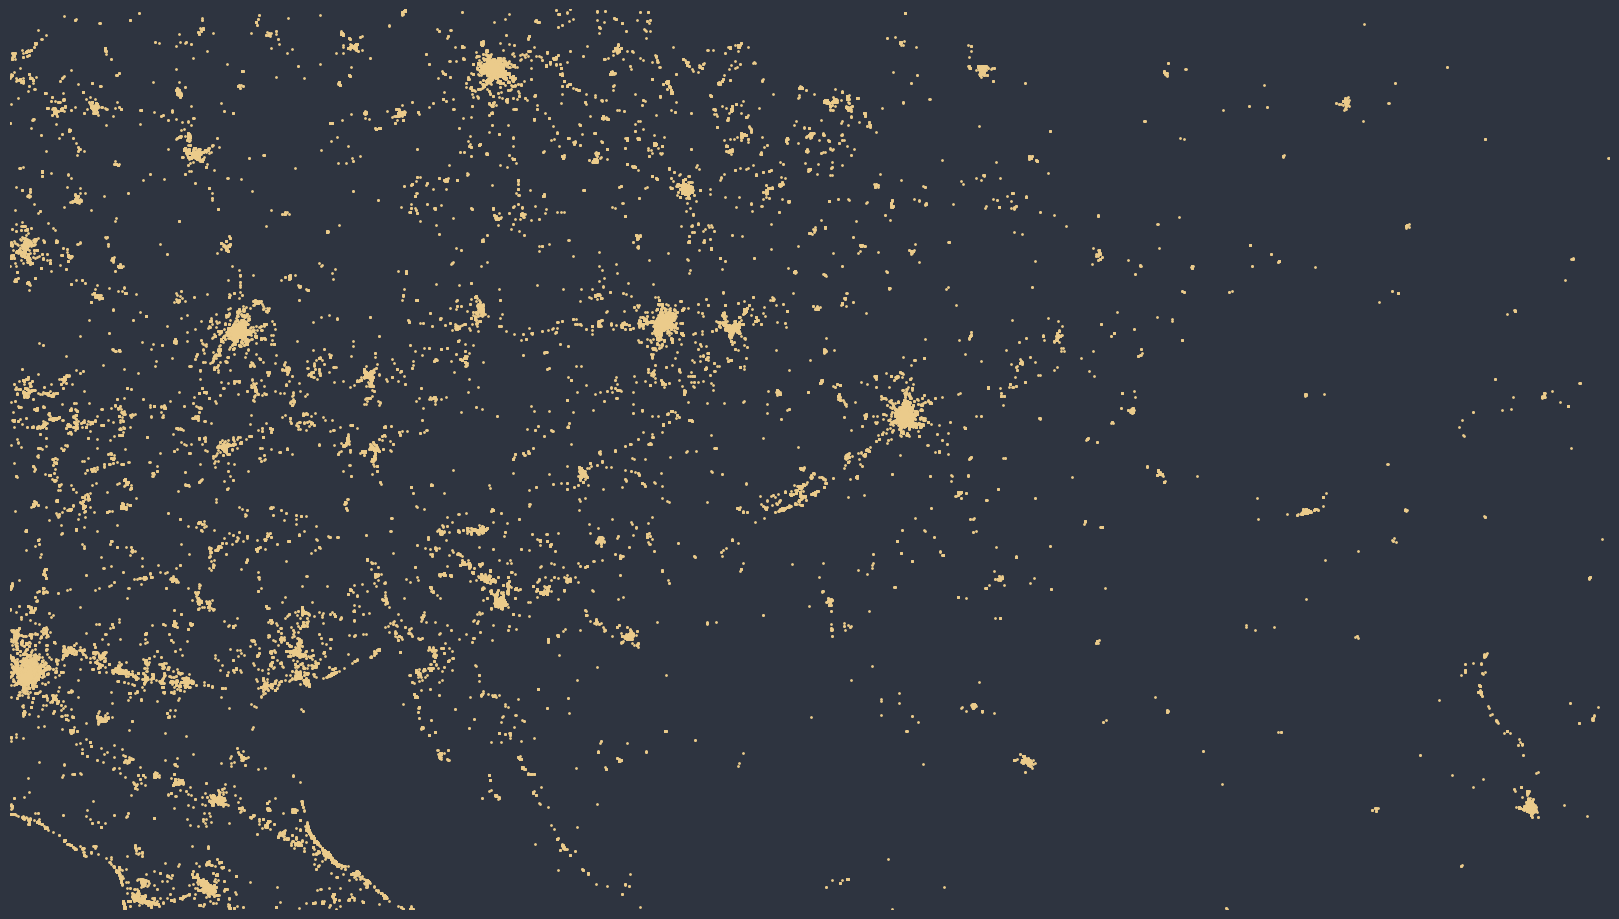

In [11]:
fig = plt.figure(figsize=(16, 9), facecolor="#2e3440")
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.set_aspect(1)
ax.margins(0)
ax.axis("off")
# ax.set_xlim([12, 27])
# ax.set_ylim([42.56, 51])
# data.to_crs(3857).plot(ax=ax, markersize=1, color="#ebcb8b")
data.plot(ax=ax, markersize=1, color="#ebcb8b")
for i in ["png"]:
    fig.savefig(f"../figures/central_europe.{i}", dpi=150, metadata=metadata[i], pad_inches=0)